# Multi-Layer- Perceptron Algorithm

## Load the Data

In [2]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()

#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]



## Vectorize your data and Encode Labels

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Join into one big string
corpus_train = [' '.join(item) for item in X_train_raw]
corpus_test = [' '.join(item) for item in X_test_raw]


# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_test = vectorizer.fit_transform(corpus_test).toarray()

# Encode the taget variables
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_raw)
y_test = encoder.fit_transform(y_test_raw)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report, accuracy_score


model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])

model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])

model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8185 - loss: 0.4784 - val_accuracy: 0.8668 - val_loss: 0.3214
Epoch 2/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8730 - loss: 0.3028 - val_accuracy: 0.8682 - val_loss: 0.3089
Epoch 3/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8814 - loss: 0.2739 - val_accuracy: 0.8676 - val_loss: 0.3103
Epoch 4/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8924 - loss: 0.2435 - val_accuracy: 0.8644 - val_loss: 0.3245
Epoch 5/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9035 - loss: 0.2108 - val_accuracy: 0.8624 - val_loss: 0.3406
Epoch 6/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9142 - loss: 0.1817 - val_accuracy: 0.8604 - val_loss: 0.3774
Epoch 7/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9230 - loss: 0.1582 - val_accuracy: 0.8552 - val_loss: 0.4120
Epoch 8/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9283 - loss: 0

In [9]:
# Evaluate the model on the test data
loss_model_1, accuracy_model_1 = model_1.evaluate(X_test, y_test)
loss_model_2, accuracy_model_2 = model_2.evaluate(X_test, y_test)
loss_model_3, accuracy_model_3 = model_3.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy_model_1*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_2*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_3*100:.2f}%')

# # Predict classes
# y_pred = model.predict(X_test, batch_size=32)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Print classification report
# print(classification_report(y_test, y_pred_classes))

# # Optionally, print overall accuracy
# overall_accuracy = accuracy_score(y_test, y_pred_classes)
# print(f'Overall Test Accuracy: {overall_accuracy*100:.2f}%')

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.3936 - loss: 10.1998
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.3935 - loss: 5.8215
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.3947 - loss: 5.5450
Test Accuracy: 39.19%
Test Accuracy: 39.23%
Test Accuracy: 39.32%


## Display the Loss

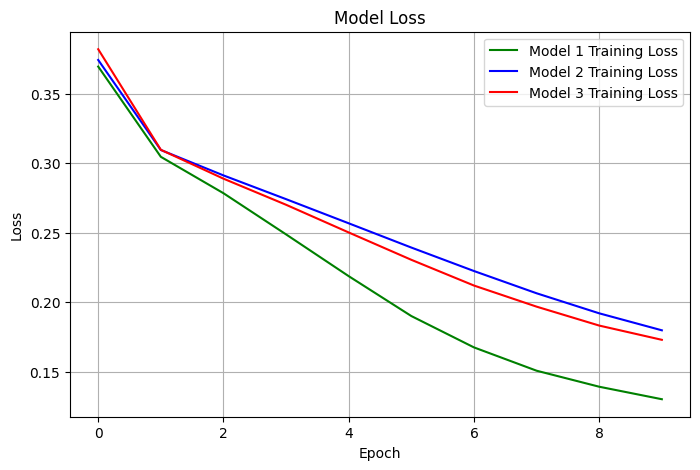

In [10]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['loss'], label='Model 1 Training Loss', color='green')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss' ,color='blue')
plt.plot(history_3.history['loss'], label='Model 3 Training Loss', color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()